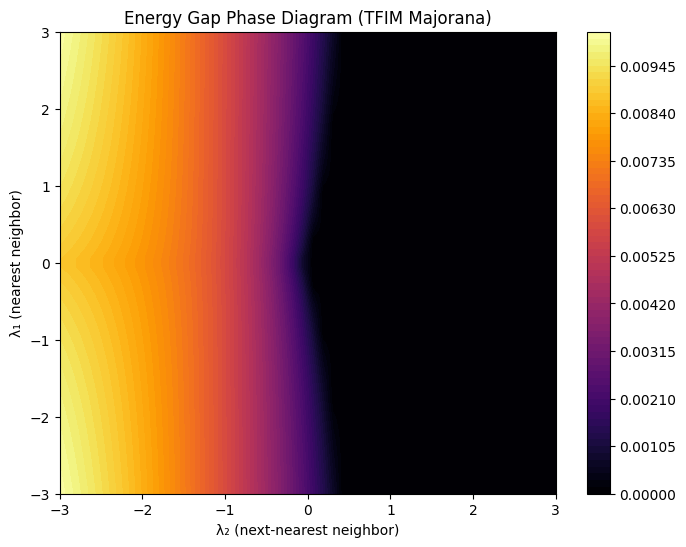

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from src.tfim_model_core import build_tfim_hamiltonian

def compute_energy_gap(H):
    eigvals = np.linalg.eigvalsh(H)
    eigvals.sort()
    return eigvals[1] - eigvals[0]  # First gap above ground state

n = 100
lambda1_vals = np.linspace(-3, 3, 50)
lambda2_vals = np.linspace(-3, 3, 50)
gap_map = np.zeros((len(lambda1_vals), len(lambda2_vals)))

for i, l1 in enumerate(lambda1_vals):
    for j, l2 in enumerate(lambda2_vals):
        H = build_tfim_hamiltonian(n, l1, l2)
        gap_map[i, j] = compute_energy_gap(H)

plt.figure(figsize=(8,6))
cp = plt.contourf(lambda2_vals, lambda1_vals, gap_map, levels=100, cmap='inferno')
plt.colorbar(cp)
plt.xlabel("λ₂ (next-nearest neighbor)")
plt.ylabel("λ₁ (nearest neighbor)")
plt.title("Energy Gap Phase Diagram (TFIM Majorana)")
plt.savefig("plots/phase_diagram_tfim_majorana.png", dpi=300)
plt.show()
